# K-Means Clustering

1) Import the raw data set into a Pandas DataFrame.

2) Follow the steps in the lesson to prepare the data set for K-means clustering.

3) Create a model for each value of K from 2 through 5, inclusive. Create a scatterplot for each model, using color to distinguish between clusters.

4) Create additional models for K=6 through K=9, inclusive. Then generate a scree plot for all 8 models you've created. (Hint: use the .inertia_ attribute of your K-means instance as your vertical axis values.) Judging from the scree plot, what appears to be a reasonable choice of K for this data set?

## Imports

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances_argmin
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [53]:
animals = pd.read_csv("2021-11-ml-09-k-means-animals-dataset.csv")

In [54]:
animals.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN
3,Anvers,"Adult, 1 Egg Stage",N2A2,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN


In [55]:
animals.shape

(344, 10)

## Data Cleaning/Processing

In [56]:
animals.drop(columns=['Region','Stage','Comments','Individual ID'],inplace=True)

In [57]:
animals.dropna(thresh=len(animals.axes[1])/2,axis=0,inplace=True)

In [58]:
animals.shape

(342, 6)

In [59]:
def outlier_check(value, mean, std):
    if ((mean + 3*std) < value) or ((mean - 3*std)> value):
        return [True, value]
    else:
        return [False, value]
    
for x in list(animals.columns):
    try:
        outlier_list = []
        print("\n")
        print(x)
        for y in animals[x]:
            if outlier_check(y,animals[x].mean(),animals[x].std())[0]:
                outlier_list.append(outlier_check(y,animals[x].mean(),animals[x].std())[1])
        print(outlier_list)
    except:
        print("Non-numeric column")



Culmen Length (mm)
[]


Culmen Depth (mm)
[]


Flipper Length (mm)
[]


Body Mass (g)
[]


Delta 15 N (o/oo)
[]


Delta 13 C (o/oo)
[]


In [60]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   342 non-null    float64
 1   Culmen Depth (mm)    342 non-null    float64
 2   Flipper Length (mm)  342 non-null    float64
 3   Body Mass (g)        342 non-null    float64
 4   Delta 15 N (o/oo)    330 non-null    float64
 5   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6)
memory usage: 18.7 KB


In [61]:
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

animals["Delta 13 C (o/oo)"] = mean_imp.fit_transform(animals['Delta 13 C (o/oo)'].values.reshape(-1,1))
animals["Delta 15 N (o/oo)"] = mean_imp.fit_transform(animals['Delta 15 N (o/oo)'].values.reshape(-1,1))

In [62]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   342 non-null    float64
 1   Culmen Depth (mm)    342 non-null    float64
 2   Flipper Length (mm)  342 non-null    float64
 3   Body Mass (g)        342 non-null    float64
 4   Delta 15 N (o/oo)    342 non-null    float64
 5   Delta 13 C (o/oo)    342 non-null    float64
dtypes: float64(6)
memory usage: 18.7 KB


In [63]:
animals["Flipper Length (mm)"] = pd.to_numeric(animals["Flipper Length (mm)"],downcast= 'integer')

In [64]:
animals["Body Mass (g)"] = pd.to_numeric(animals['Body Mass (g)'],downcast='integer')

In [65]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   342 non-null    float64
 1   Culmen Depth (mm)    342 non-null    float64
 2   Flipper Length (mm)  342 non-null    int16  
 3   Body Mass (g)        342 non-null    int16  
 4   Delta 15 N (o/oo)    342 non-null    float64
 5   Delta 13 C (o/oo)    342 non-null    float64
dtypes: float64(4), int16(2)
memory usage: 14.7 KB


## Scatter plots for N K-Mean clusters and a Scree Plot

Showing unscaled plots of variables color coded by their scaled centers.

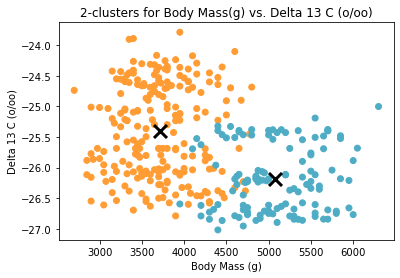

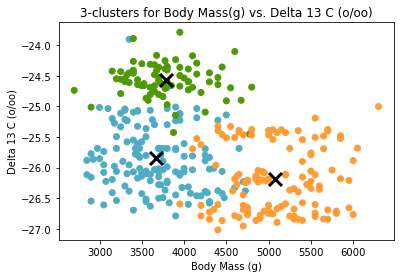

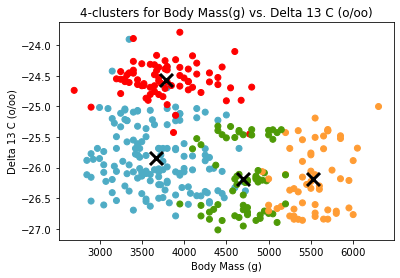

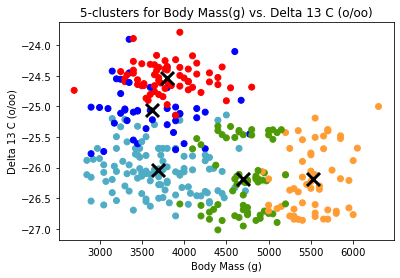

In [152]:
colors = ["#4EACC5", "#FF9C34", "#4E9A06","red",'blue']
kmean = []
colormap = mpl.colors.ListedColormap(colors)

for k in range(2,6):
    kmean.append(KMeans(n_clusters=k,random_state=0).fit(scale(animals)))
    color_indices = kmean[k-2].labels_
    colormap = mpl.colors.ListedColormap(colors[:k])
    plt.scatter(animals['Body Mass (g)'],animals['Delta 13 C (o/oo)'],c=color_indices,cmap=colormap)
    centroids = kmean[k-2].cluster_centers_
    plt.scatter(centroids[:, 3]*animals['Body Mass (g)'].std()+animals['Body Mass (g)'].mean(), centroids[:, 5]*animals['Delta 13 C (o/oo)'].std()+animals['Delta 13 C (o/oo)'].mean(),marker="x",
        s=169, linewidths=3, color="black")
    plt.title(f"{k}-clusters for Body Mass(g) vs. Delta 13 C (o/oo)")
    plt.xlabel('Body Mass (g)')
    plt.ylabel('Delta 13 C (o/oo)')
    plt.show()

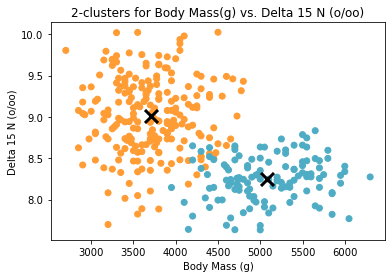

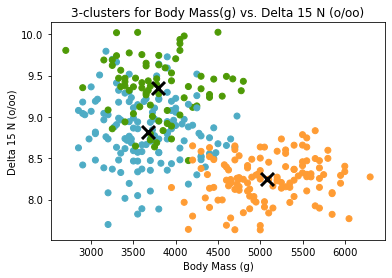

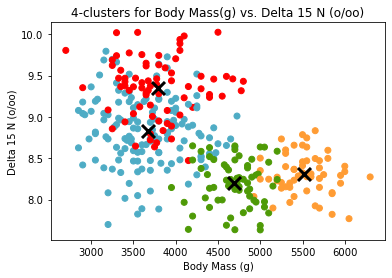

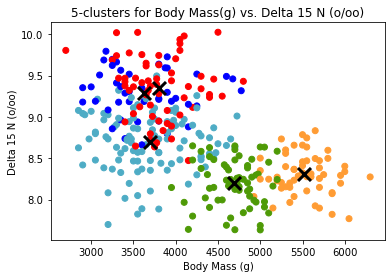

In [151]:
colors = ["#4EACC5", "#FF9C34", "#4E9A06","red",'blue','purple']
kmean = []
colormap = mpl.colors.ListedColormap(colors)

for k in range(2,6):
    kmean.append(KMeans(n_clusters=k,random_state=0).fit(scale(animals)))
    color_indices = kmean[k-2].labels_
    colormap = mpl.colors.ListedColormap(colors[:k])
    plt.scatter(animals['Body Mass (g)'],animals['Delta 15 N (o/oo)'],c=color_indices,cmap=colormap)
    centroids = kmean[k-2].cluster_centers_
    plt.scatter(centroids[:, 3]*animals['Body Mass (g)'].std()+animals['Body Mass (g)'].mean(), centroids[:, 4]*animals['Delta 15 N (o/oo)'].std()+animals['Delta 15 N (o/oo)'].mean(),marker="x",
        s=169, linewidths=3, color="black")
    plt.title(f"{k}-clusters for Body Mass(g) vs. Delta 15 N (o/oo)")
    plt.xlabel('Body Mass (g)')
    plt.ylabel('Delta 15 N (o/oo)')
    plt.show()

Scaled plots color coded by their scaled centers

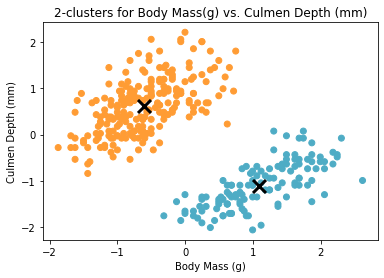

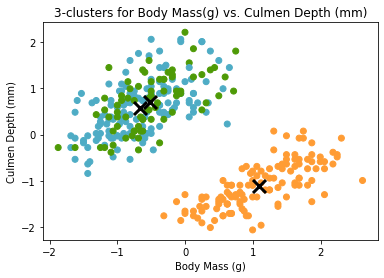

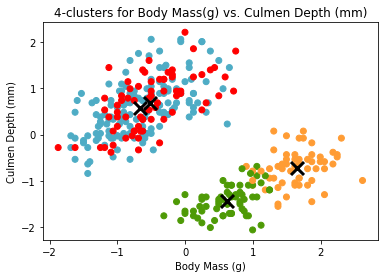

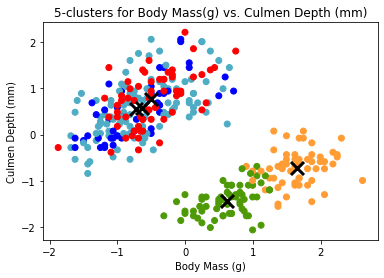

In [149]:
colors = ["#4EACC5", "#FF9C34", "#4E9A06","red",'blue']
kmean = []
colormap = mpl.colors.ListedColormap(colors)

for k in range(2,6):
    kmean.append(KMeans(n_clusters=k,random_state=0).fit(scale(animals)))
    color_indices = kmean[k-2].labels_
    colormap = mpl.colors.ListedColormap(colors[:k])
    plt.scatter(scale(animals)[:, 3],scale(animals)[:, 1],c=color_indices,cmap=colormap)
    centroids = kmean[k-2].cluster_centers_
    plt.scatter(centroids[:, 3], centroids[:, 1],marker="x",
        s=169, linewidths=3, color="black")
    plt.title(f"{k}-clusters for Body Mass(g) vs. Culmen Depth (mm)")
    plt.xlabel('Body Mass (g)')
    plt.ylabel('Culmen Depth (mm)')
    plt.show()

Text(0, 0.5, 'Inertia')

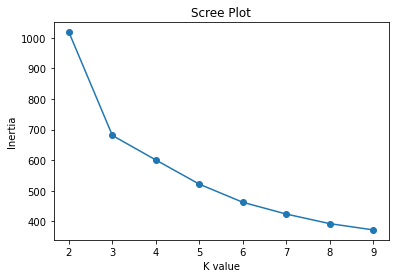

In [153]:
inertia_list = []
klist = []
kmean = []
for k in range(2,10):
    klist.append(k)
    kmean.append(KMeans(n_clusters=k,random_state=0).fit(scale(animals)))
    inertia_list.append(kmean[k-2].inertia_)

plt.plot(klist,inertia_list,marker='o')
plt.title('Scree Plot')
plt.xlabel('K value')
plt.ylabel('Inertia')

It looks like a k value of 3 is optimal.